## Random Forest Model

#### 01. Importing Libraries and Data
#### 02. Preprocessing: Wrangling, Reshaping and Splitting the Data
#### 03. Creating Random Forests
            2010s Data
            2000s Data
#### 04. Uncovering Feature Importances
            2010s Data
            2000s Data
#### 05. Modeling the 3 Most Influential Weather Stations and Uncovering their Feature Importances
            Madrid
            Budapest
            Basel

### 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [2]:
%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
# Define path
path = r'C:\Users\Lukman\Desktop\FEMINA CF\Machine Learning'

In [5]:
# Import data
climate = pd.read_csv(os.path.join(path, 'Datasets','climate_cleaned_with_date.csv'))
climate

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0                   0.81             1.0195                       0.88   
1                   0.84             1.0172                       0.25   
2                   0.77             1.0179                       0.67   
3                   0.93             1.0268                       0.25   
4                   0.99             1.0286                       0.25   
...                  ...                ...                        ...   
22945               0.68             1.0278                       1.57   
22946               0.68             1.0295                       1.57   
22947               0.68             1.0278                       1.57   
22948               0.68             1.0238                       1.57   
22949               0.68             1.0235                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                        0.00                7.0                 3.7   
1                        0.00                0.0                 2.9   
2                        0.00                3.5                 3.1   
3                        0.00                0.0                 2.0   
4                        0.06      

In [7]:
#Read in the pleasant weather data.
df = pd.read_csv(os.path.join(path,'Datasets','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

## 02. Preprocessing: Wrangling, Reshaping and Splitting the Data

### Preprocessing for Random Forest  (2010s Weather Data)

In [8]:
# Reduce observations dataset to 2010's

climate2010= climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
climate2010.shape

(3652, 137)

In [9]:
# Filter pleasant dataset to 2010s
pleasant_2010 = df[df['DATE'].astype(str).str.startswith('201')] 
pleasant_2010

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [10]:
# Drop 'DATE' and 'MONTH' columns from 2010s weather dataset
climate2010_2 = climate2010.drop(columns=['DATE', 'MONTH'])

# Check shape
climate2010_2.shape

(3652, 135)

In [11]:
# Drop 'DATE' column from 2010s pleasant dataset
pleasant_2010_2 = pleasant_2010.drop(columns=['DATE'])

# Check shape
pleasant_2010_2.shape

(3652, 15)

In [12]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_1 = pleasant_2010_2.max(axis=1)
print("Shape of y_1_combined:", y_1.shape)

Shape of y_1_combined: (3652,)


In [13]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_1_combined:", y_1.unique())

Unique values in y_1_combined: [0 1]


In [14]:
# Ensure y has the correct shape
y_1 = y_1.to_numpy().reshape(-1)

In [15]:
# Check shape
y_1.shape

(3652,)

In [16]:
# Create X matrix
X_1 = climate2010_2.to_numpy()

In [17]:
# Check shapes
print(X_1.shape)
print(y_1.shape)

(3652, 135)
(3652,)


In [18]:
# Split data into training and testing sets

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=127)

In [19]:
# Check shapes
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(2739, 135) (2739,)
(913, 135) (913,)


### Preprocessing for Random Forest  (2000s Weather Data)

In [20]:
# Filter weather dataset to 2000s
climate2000s = climate[climate['DATE'].astype(str).str.startswith('200')] 
climate2000s.head(1)

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                     0.2                 0.03             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
14610               0.88             1.0275                       0.24   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
14610                     0.0                0.0                -2.5   

       BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
14610               -3.2               -0.4                     3   

       BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
14610               0.92             1.0268                       0.52   

       BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
14610                     0.0                3.7                -4.9   

       BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  \
14610               -8.4               -0.7                   7   

       DEBILT_humidity  DEBILT_pressure  DEBILT_global_radiation  \
14610             0.97            1.024                     0.14   

       DEBILT_precipitation  DEBILT_sunshine  DEBILT_temp_mean  \
14610                   0.1              0.0               6.1   

       DEBILT_temp_min  DEBILT_temp_max  DUSSELDORF_cloud_cover  \
14610              3.5              8.1                       8   

       DUSSELDORF_humidity  DUSSELDORF_pressure  DUSSELDORF_global_radiation  \
14610                 0.92                1.024                         0.12   

       DUSSELDORF_precipitation  DUSSELDORF_sunshine  DUSSELDORF_temp_mean  \
14610                      0.22                  0.0                   4.2   

       DUSSELDORF_temp_min  DUSSELDORF_temp_max  HEATHROW_cloud_cover  \
14610                  2.5                  6.9                     7   

       HEATHROW_humidity  HEATHROW_pressure  HEATHROW_global_radiation  \
14610               0.94             1.0245                       0.18   

       HEATHROW_precipitation  HEATHROW_sunshine  HEATHROW_temp_mean  \
14610                     0.0                0.4                 7.0   

       HEATHROW_temp_min  HEATHROW_temp_max  KASSEL_cloud_cover  \
14610                4.9               10.8                   8   

       KASSEL_humidity  KASSEL_pressure  KASSEL_global_radiation  \
14610             0.93           1.0237                     0.12   

       KASSEL_precipitation  KASSEL_sunshine  KASSEL_temp_mean  \
14610                  0.13              0.0               3.5   

       KASSEL_temp_min  KASSEL_temp_max  LJUBLJANA_cloud_cover  \
14610              1.5              5.0                      6   

       LJUBLJANA_humidity  LJUBLJANA_pressure  LJUBLJANA_global_radiation  \
14610                0.83              1.0294                        0.57   

       LJUBLJANA_precipitation  LJUBLJANA_sunshine  LJUBLJANA_temp_mean  \
14610                      0.0                 5.2                 -4.8   

       LJUBLJANA_temp_min  LJUBLJANA_temp_max  MAASTRICHT_cloud_cover  \
14610                -9.1                -1.3                       8   

       MAASTRICHT_humidity  MAASTRICHT_pressure  MAASTRICHT_global_radiation  \
14610                 0.98               1.0251                         0.12   

       MAASTRICHT_precipitation  MAASTRICHT_sunshine  MAASTRICHT_temp_mean  \
14610                      0.17                  0.0                   5.6   

       MAASTRICHT_temp_min  MAASTRICHT_temp_max  MADRID_cloud_cover  \
14610                  4.1                  6.9                   1   

       MADRID_humidity  MADRID_pressure  MADRID_global_radiation  \
14610   

In [21]:
climate2000s.shape

(3653, 137)

In [22]:
# Filter pleasant dataset to 2000s
pleasant_2000s = df[df['DATE'].astype(str).str.startswith('200')] 
pleasant_2000s.head(1)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0

In [23]:
# Check shape
pleasant_2000s.shape

(3653, 16)

In [24]:
# Drop 'DATE' and 'MONTH' columns from 2000s weather dataset
climate2000s_2 = climate2000s.drop(columns=['DATE', 'MONTH'])

# Check shape
climate2000s_2.shape

(3653, 135)

In [25]:
# Drop 'DATE' column from 2000s pleasant dataset
pleasant_2000s_2 = pleasant_2000s.drop(columns=['DATE'])

# Check shape
pleasant_2000s_2.shape

(3653, 15)

In [26]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y_2 = pleasant_2000s_2.max(axis=1)
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (3653,)


In [27]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_2_combined:", y_2.unique())

Unique values in y_2_combined: [0 1]


In [28]:
# Ensure y has the correct shape
y_2 = y_2.to_numpy().reshape(-1)

In [29]:
# Check shape
y_2.shape

(3653,)

In [30]:
# Create X matrix
X_2 = climate2000s_2.to_numpy()

In [31]:
# Check shapes
print(X_2.shape)
print(y_2.shape)

(3653, 135)
(3653,)


In [32]:
# Split data into training and testing sets

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

In [33]:
# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(2739, 135) (2739,)
(914, 135) (914,)


## 03. Creating Random Forests

### Random Forest  (2010s Data)

In [34]:
# Creating a Random Forest classifier
clf_1 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10)

In [35]:
# Perform the predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy:  0.9780941949616648


In [36]:
# Check unique values in y
unique_classes = np.unique(y_1)
print(unique_classes)
print(len(unique_classes)) 

[0 1]
2


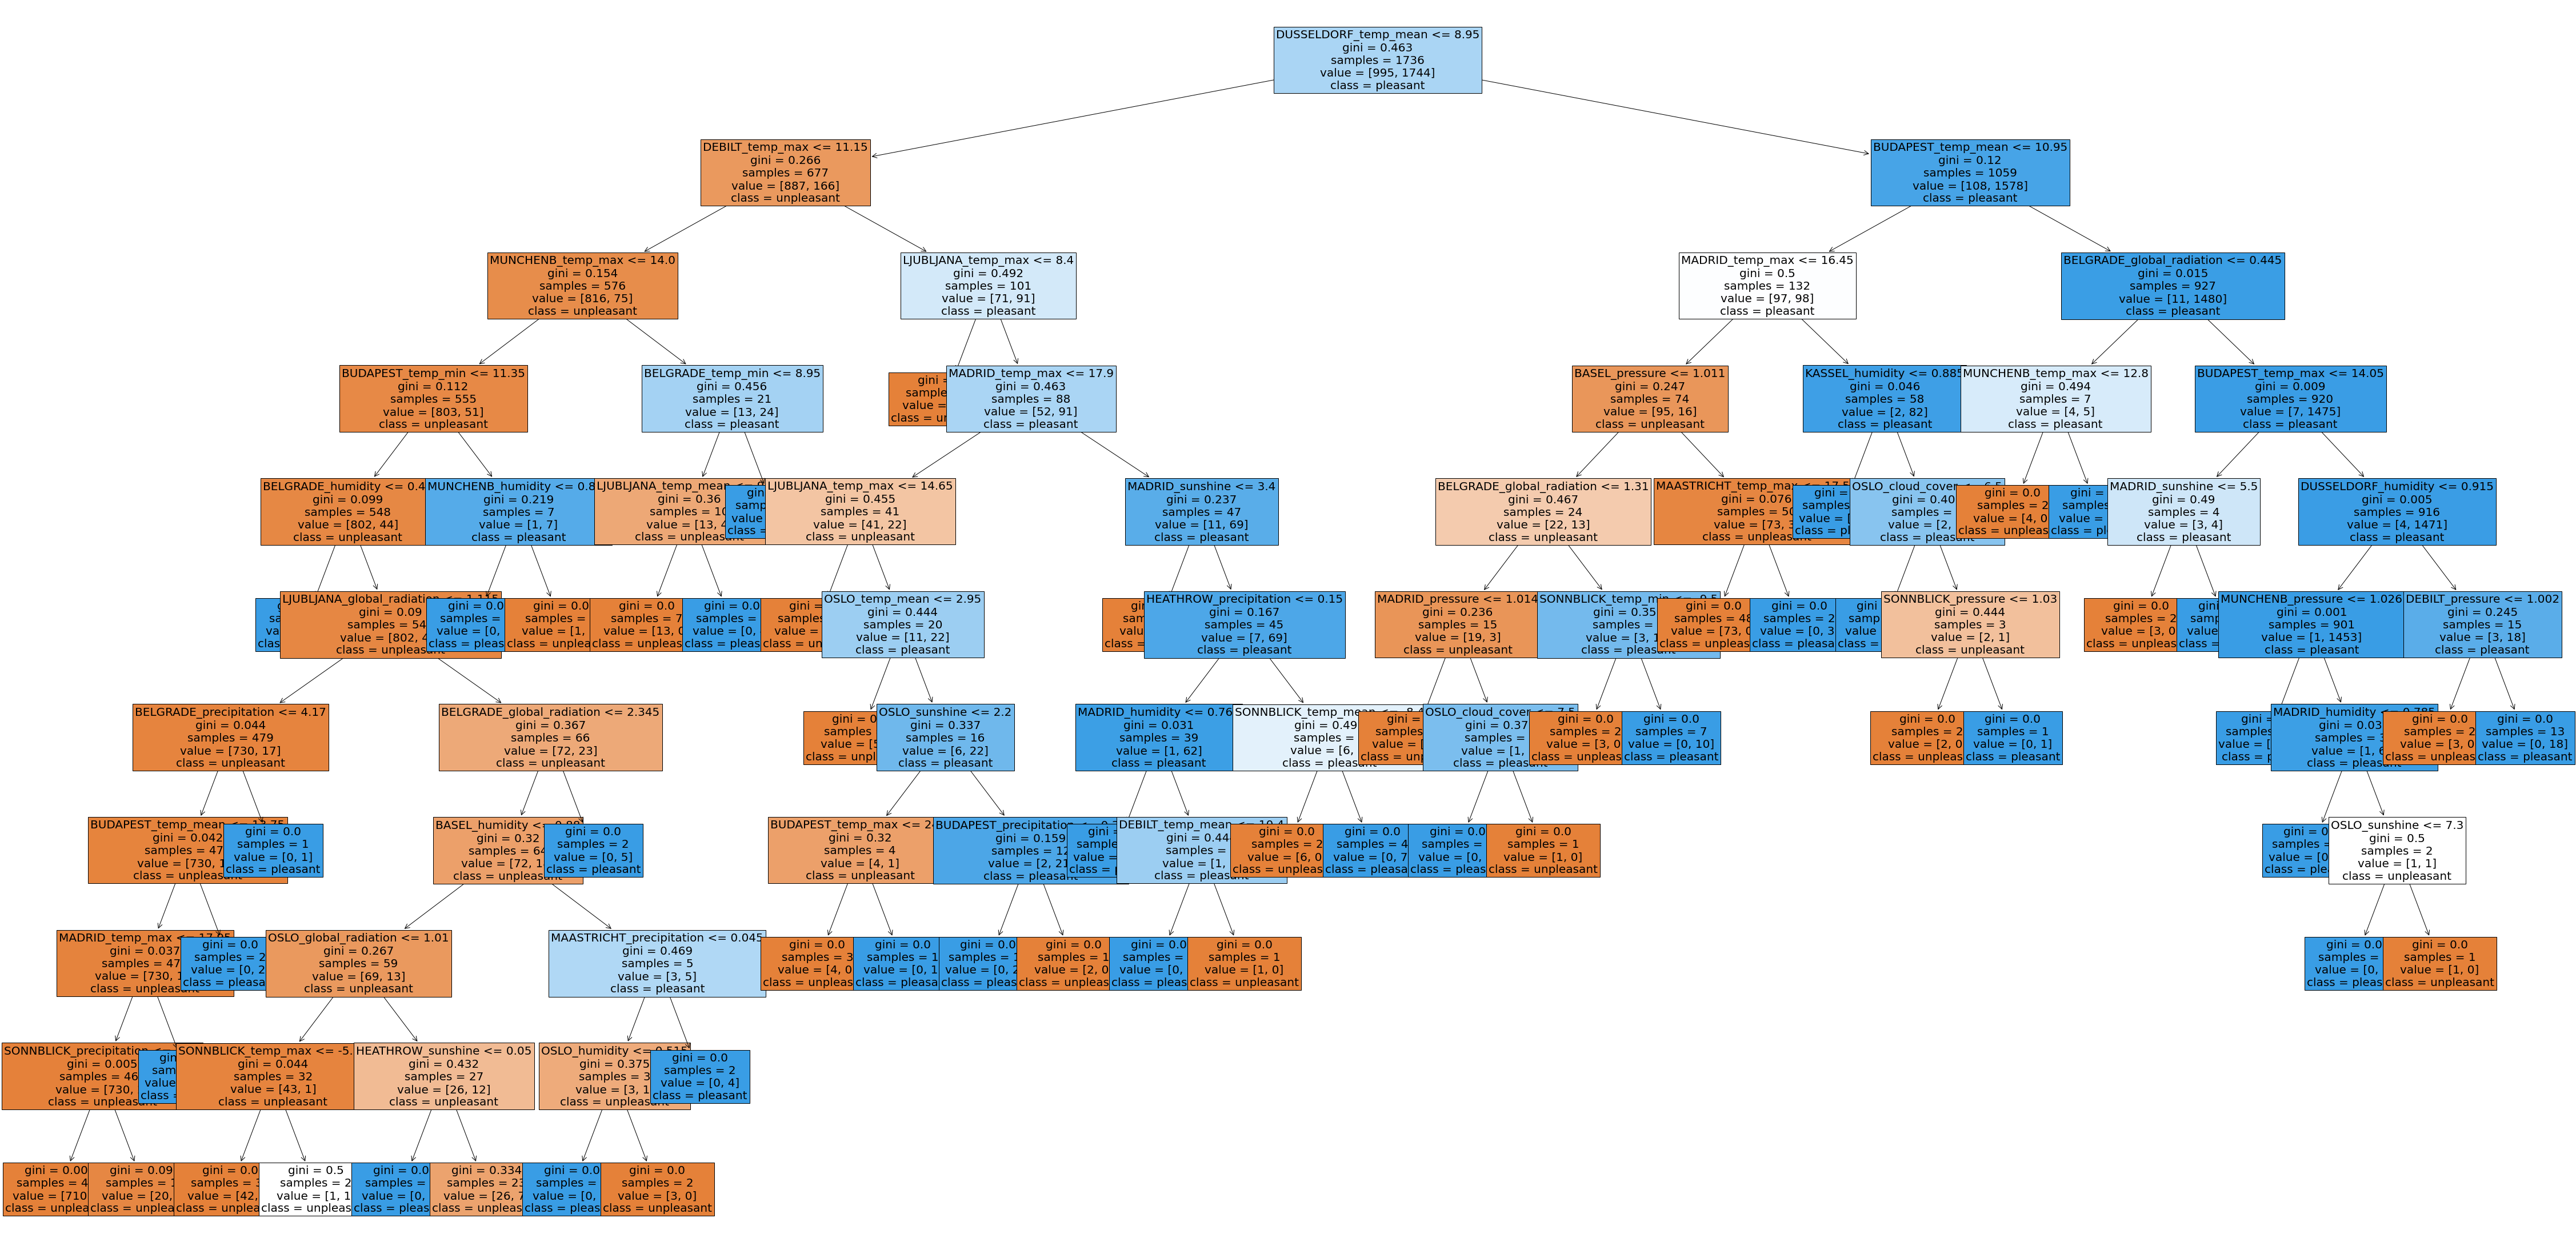

In [37]:
# Plot random forest (2010s)
rf_1 = plt.figure(figsize=(80,40))
plot_tree(clf_1.estimators_[5], fontsize = 20, feature_names=climate2010_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [38]:
rf_1.savefig(os.path.join(path, '04 Reports', 'Visualizations', 'random_forest_2010s.png'),bbox_inches='tight')

### Random Forest (2000s Data)

In [39]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [40]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  0.9649890590809628


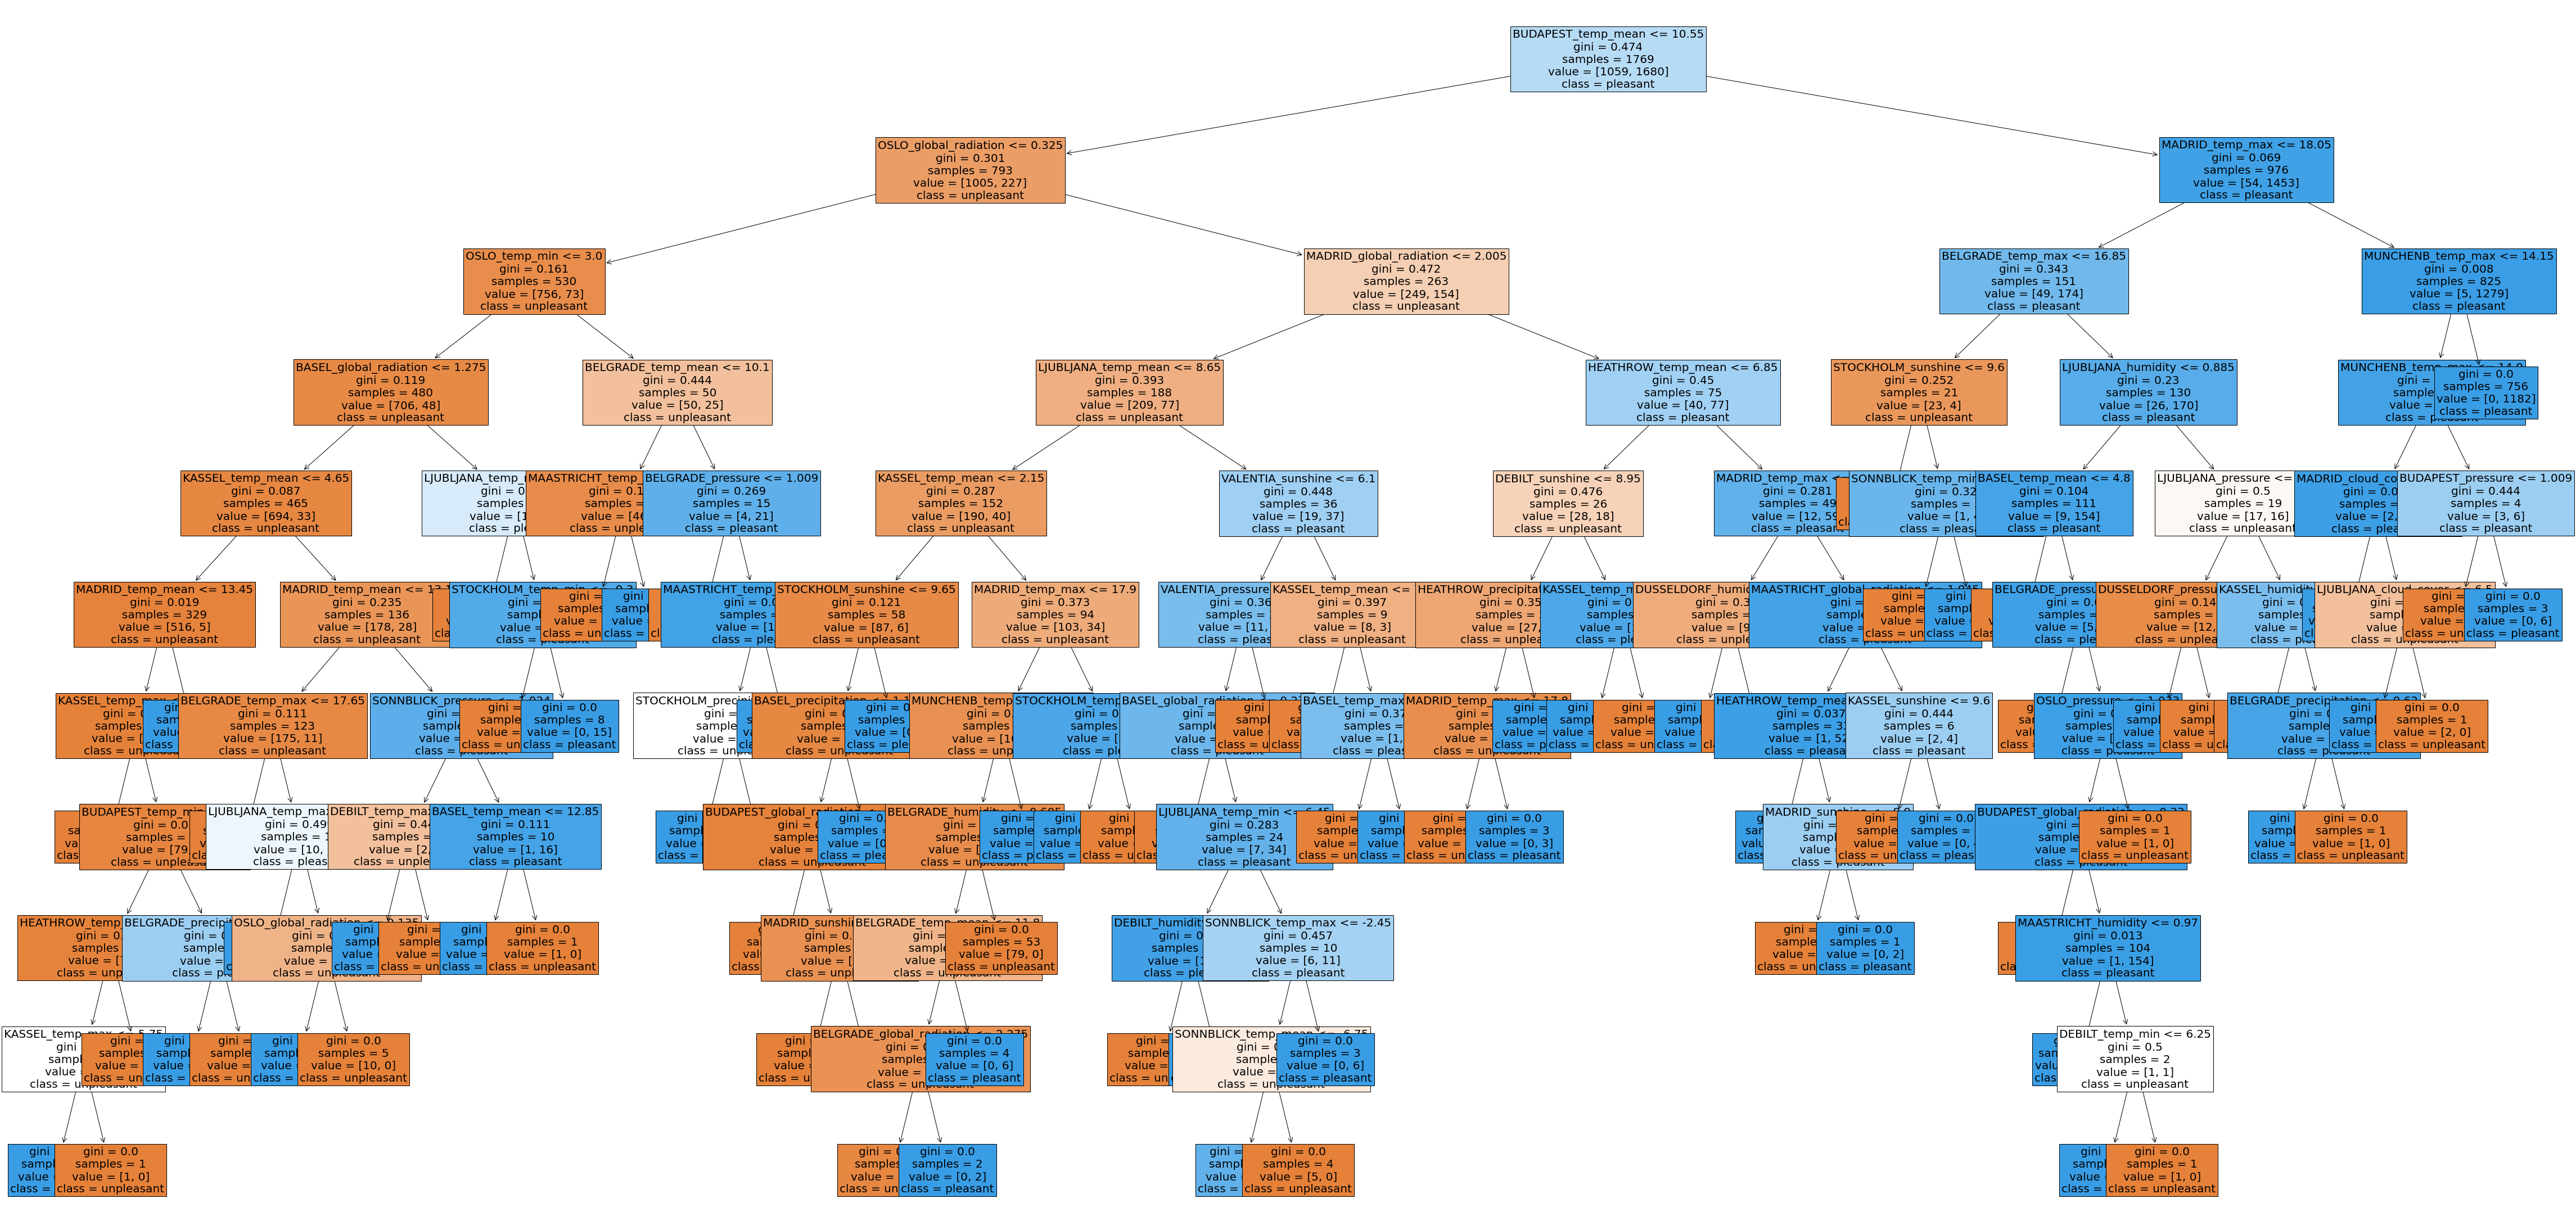

In [41]:
# Plot random forest (2010s)
rf_2 = plt.figure(figsize=(80,40))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=climate2000s_2.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [42]:
rf_2.savefig(os.path.join(path, '04 Reports', 'Visualizations', 'random_forest_2000s.png'),bbox_inches='tight')

## 04. Uncovering Feature Importances

### 2010s Data

In [43]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [4.65302565e-04 8.69659990e-04 1.20242732e-03 2.31117275e-03
 4.54518564e-04 1.08998069e-03 3.91398431e-02 6.63819919e-03
 4.91659472e-02 9.10469940e-04 2.34774470e-03 1.97408623e-03
 1.15382102e-03 2.51361998e-03 1.36272469e-03 2.34944331e-02
 8.20638356e-03 2.02945225e-02 3.25348479e-04 0.00000000e+00
 0.00000000e+00 9.95687182e-04 8.38287089e-04 1.16323826e-03
 2.89144947e-02 1.63606793e-02 1.04710211e-01 4.61521703e-04
 8.69320118e-04 1.22029347e-03 2.67304896e-03 7.01752426e-04
 7.59030153e-04 9.22107068e-03 9.96753986e-04 2.17287867e-02
 4.25909988e-04 1.14423744e-03 1.12369434e-03 6.16306971e-03
 5.01052672e-04 6.75392633e-04 2.37224687e-02 1.47462224e-03
 1.12571954e-02 6.43563140e-04 1.28527358e-03 1.39308140e-03
 3.46274690e-03 8.17840187e-04 1.37281015e-03 5.45910648e-03
 1.61809510e-03 1.92024119e-02 6.44741932e-04 3.41779967e-04
 6.72588536e-04 8.63687053e-04 2.75098031e-04 4.37019353e-04
 4.81668143e-04 5.00924399e-04 1.51011664e-03 6.96799273e-04
 1.

In [44]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [45]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.10133705 0.06225781 0.15330795 0.03863158 0.04648764 0.03525493
 0.00572762 0.11681208 0.04575327 0.22921922 0.06121766 0.03915197
 0.01515494 0.04571319 0.00397311]


In [46]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [47]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [48]:
# Sort by importance for chart readability
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.229219
2         BUDAPEST    0.153308
7        LJUBLJANA    0.116812
0            BASEL    0.101337
1         BELGRADE    0.062258
10        MUNCHENB    0.061218
4       DUSSELDORF    0.046488
8       MAASTRICHT    0.045753
13       STOCKHOLM    0.045713
11            OSLO    0.039152
3           DEBILT    0.038632
5         HEATHROW    0.035255
12       SONNBLICK    0.015155
6           KASSEL    0.005728
14        VALENTIA    0.003973


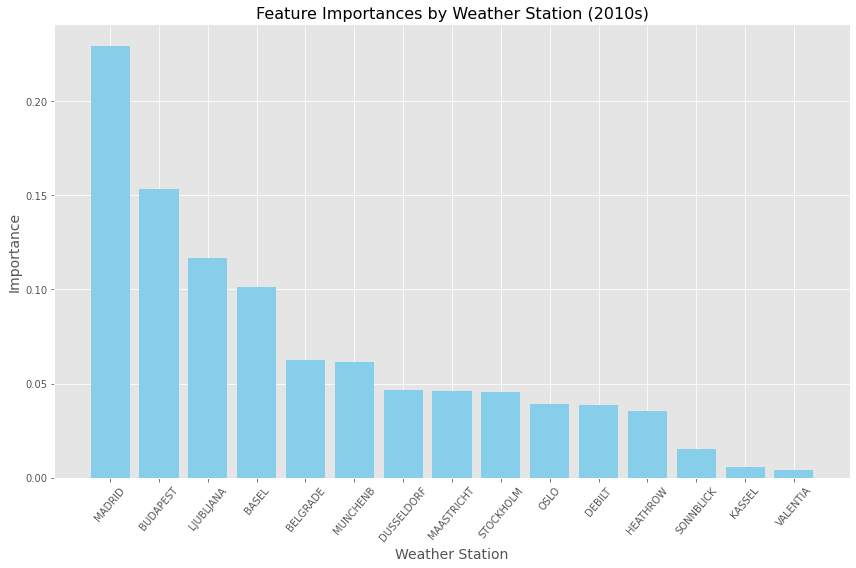

In [49]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2010s)', fontsize=16)
plt.tight_layout()
plt.show()

In [50]:
plt_1.savefig(os.path.join(path, '04 Reports', 'Visualizations', 'feature_importances_2010s.png'),bbox_inches='tight')

### 2000s Data

In [51]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)

Feature Importances: [0.00060054 0.00103908 0.00116026 0.00236244 0.00074315 0.00079852
 0.040198   0.01244767 0.04224376 0.0012741  0.00314137 0.00147962
 0.00738809 0.0031254  0.00208029 0.03990817 0.00957052 0.03099543
 0.00069575 0.0012167  0.00142792 0.00944671 0.00149055 0.00236667
 0.07255336 0.00561167 0.05088736 0.00033895 0.00102001 0.00101667
 0.00390938 0.00068505 0.00080387 0.00722914 0.00133041 0.00859966
 0.00059801 0.00097096 0.00136543 0.00766611 0.00056201 0.00123062
 0.00928734 0.00105075 0.02064543 0.00021787 0.00088162 0.00108257
 0.00375773 0.00065611 0.00107181 0.01287017 0.00604332 0.01037523
 0.00069638 0.00123644 0.00094131 0.00235681 0.0007581  0.00119087
 0.03229315 0.0012019  0.00925704 0.00053527 0.00134114 0.00133992
 0.00195669 0.00095976 0.00136274 0.03862801 0.00239053 0.03130731
 0.00044206 0.00073253 0.00122093 0.0020106  0.00060963 0.00069154
 0.00152089 0.00089915 0.0216147  0.0012637  0.00250542 0.00246207
 0.01432765 0.00214732 0.00417205 0.10590

In [52]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances_2 = feature_importances_2.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances_2.shape)

Reshaped Importances Shape: (1, 15, 9)


In [53]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances_2 = np.sum(reshaped_importances_2[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances_2.shape)
print("Collapsed Importances:", collapsed_importances_2)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.10159344 0.09896297 0.1456967  0.02493315 0.04337666 0.03695642
 0.049932   0.07982138 0.02974203 0.25271923 0.06009412 0.01768107
 0.01619052 0.03026902 0.0120313 ]


In [54]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_df_2 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_2
})

In [55]:
# Sort by importance for chart readability
collapsed_importances_df_2 = collapsed_importances_df_2.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_2)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.252719
2         BUDAPEST    0.145697
0            BASEL    0.101593
1         BELGRADE    0.098963
7        LJUBLJANA    0.079821
10        MUNCHENB    0.060094
6           KASSEL    0.049932
4       DUSSELDORF    0.043377
5         HEATHROW    0.036956
13       STOCKHOLM    0.030269
8       MAASTRICHT    0.029742
3           DEBILT    0.024933
11            OSLO    0.017681
12       SONNBLICK    0.016191
14        VALENTIA    0.012031


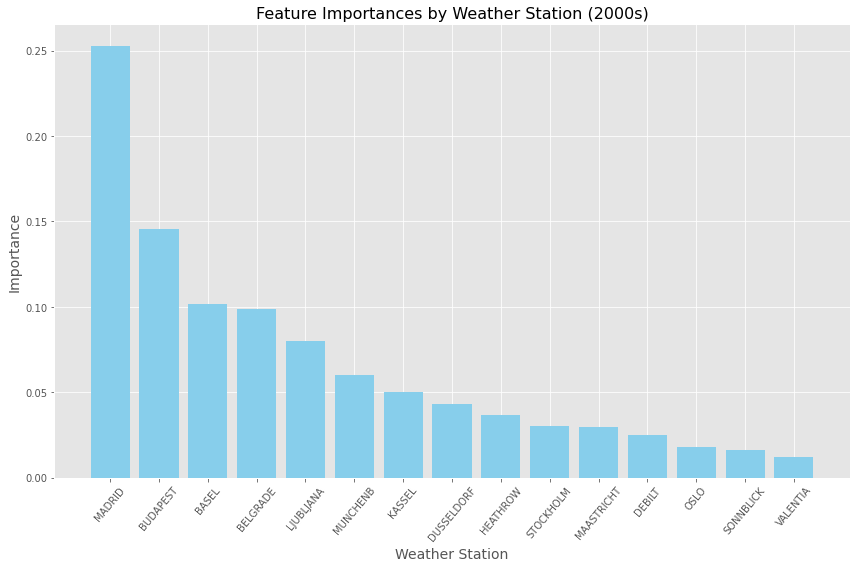

In [58]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_2['Weather Station'], collapsed_importances_df_2['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (2000s)', fontsize=16)
plt.tight_layout()
plt.show()

In [59]:
plt_2.savefig(os.path.join(path, '04 Reports', 'Visualizations', 'feature_importances_2000s.png'),bbox_inches='tight')

## 05. Modeling the 3 Most Influential Weather Stations and Uncovering their Feature Importances

### Madrid

In [61]:
# Filter weather dataset to only include Madrid
df_madrid = climate[climate.columns[climate.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_madrid.head(1)

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92            1.026   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8

In [62]:
# Filter pleasant dataset to only include Madrid
madrid_pleasant = df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]

# Check output
madrid_pleasant.head(1)

MADRID_pleasant_weather
0                        0

In [63]:
# Check shape
print(df_madrid.shape)
print(madrid_pleasant.shape)

(22950, 9)
(22950, 1)


In [64]:
# Create matrices
y_3 = madrid_pleasant.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [65]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_3_combined:", y_3.unique())

Unique values in y_3_combined: [0 1]


In [66]:
# Ensure y has the correct shape
y_3 = y_3.to_numpy().reshape(-1)

# Check shape
print(y_3.shape)

(22950,)


In [67]:
# Create X matrix
X_3 = df_madrid.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [68]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random forest - Madrid

In [69]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3)

In [70]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  0.9956430812129662


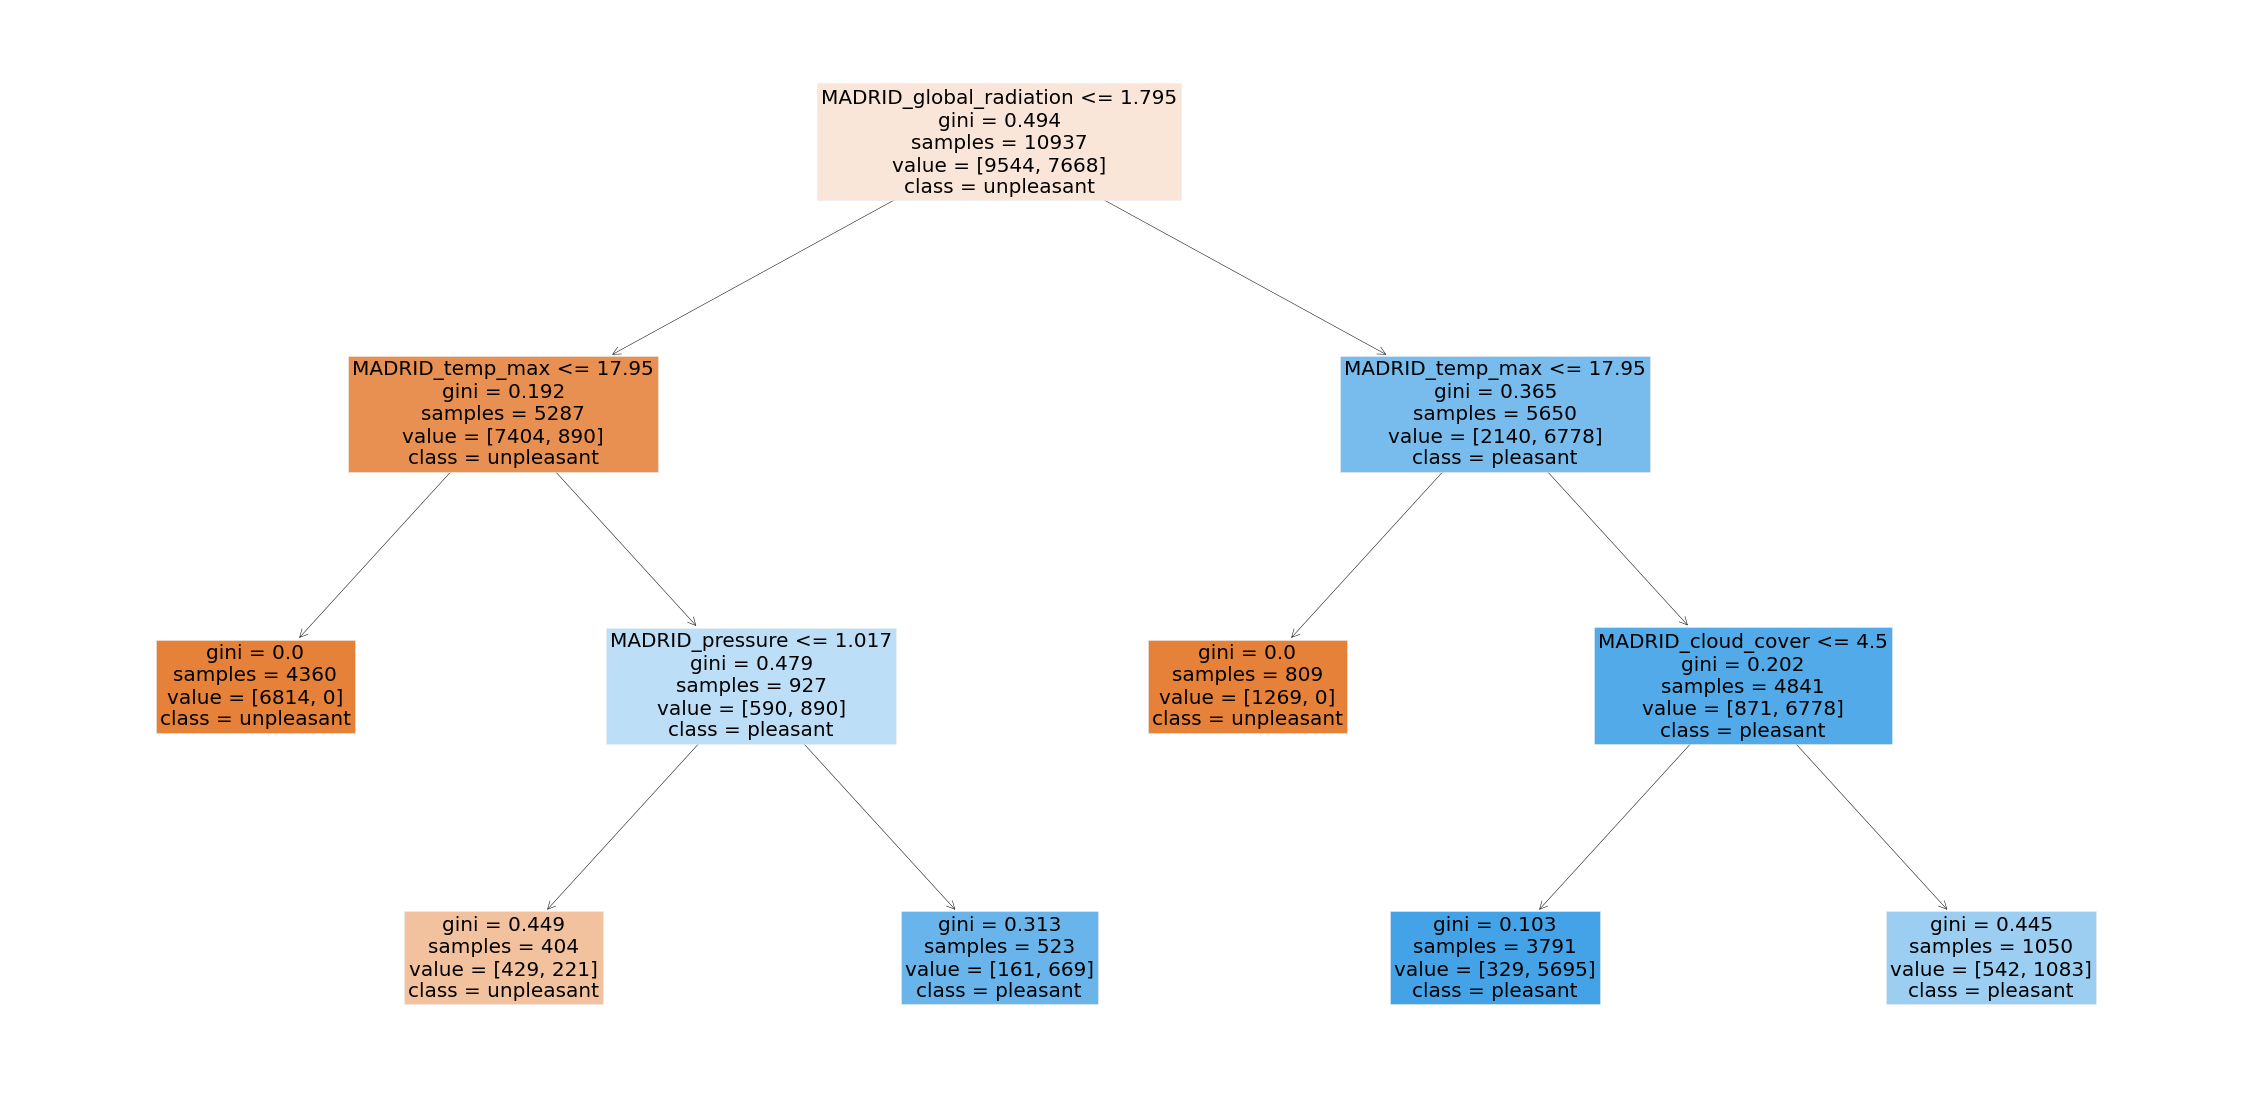

In [72]:
# Plot random forest (Madrid)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_madrid.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [73]:
# Export the plot
rf_3.savefig(os.path.join(path, '04 Reports', 'Visualizations', 'random_forest_madrid.png'),bbox_inches='tight')

In [74]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.01534181 0.00700993 0.00357074 0.1823135  0.15134724 0.07039686
 0.21379781 0.05892545 0.29729665]
(9,)


In [75]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [76]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [77]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
8          temp_max    0.297297
6         temp_mean    0.213798
3  global_radiation    0.182314
4     precipitation    0.151347
5          sunshine    0.070397
7          temp_min    0.058925
0       cloud_cover    0.015342
1          humidity    0.007010
2          pressure    0.003571


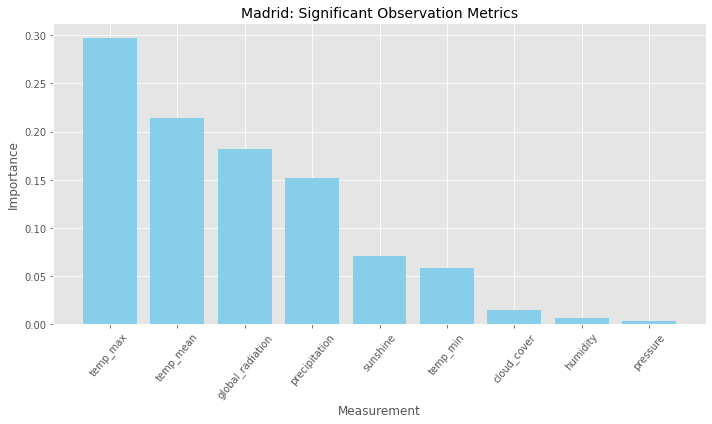

In [78]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

### Budapest

In [79]:
# Filter weather dataset to only include Budapest
df_budapest = climate[climate.columns[climate.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_budapest.head(1)

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1

In [82]:
# Filter pleasant dataset to only include Budapest
budapest_pleasant = df[df.columns[df.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
budapest_pleasant.head(1)

BUDAPEST_pleasant_weather
0                          0

In [84]:
# Check shape
print(df_budapest.shape)
print(budapest_pleasant.shape)

(22950, 9)
(22950, 1)


In [85]:
# Create matrices
y_4 = budapest_pleasant.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [86]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [87]:
# Ensure y has the correct shape
y_4 = y_4.to_numpy().reshape(-1)

# Check shape
print(y_4.shape)

(22950,)


In [89]:
# Create X matrix
X_4 = df_budapest.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [90]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random Forest - Budapest

In [91]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [92]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9979086789822238


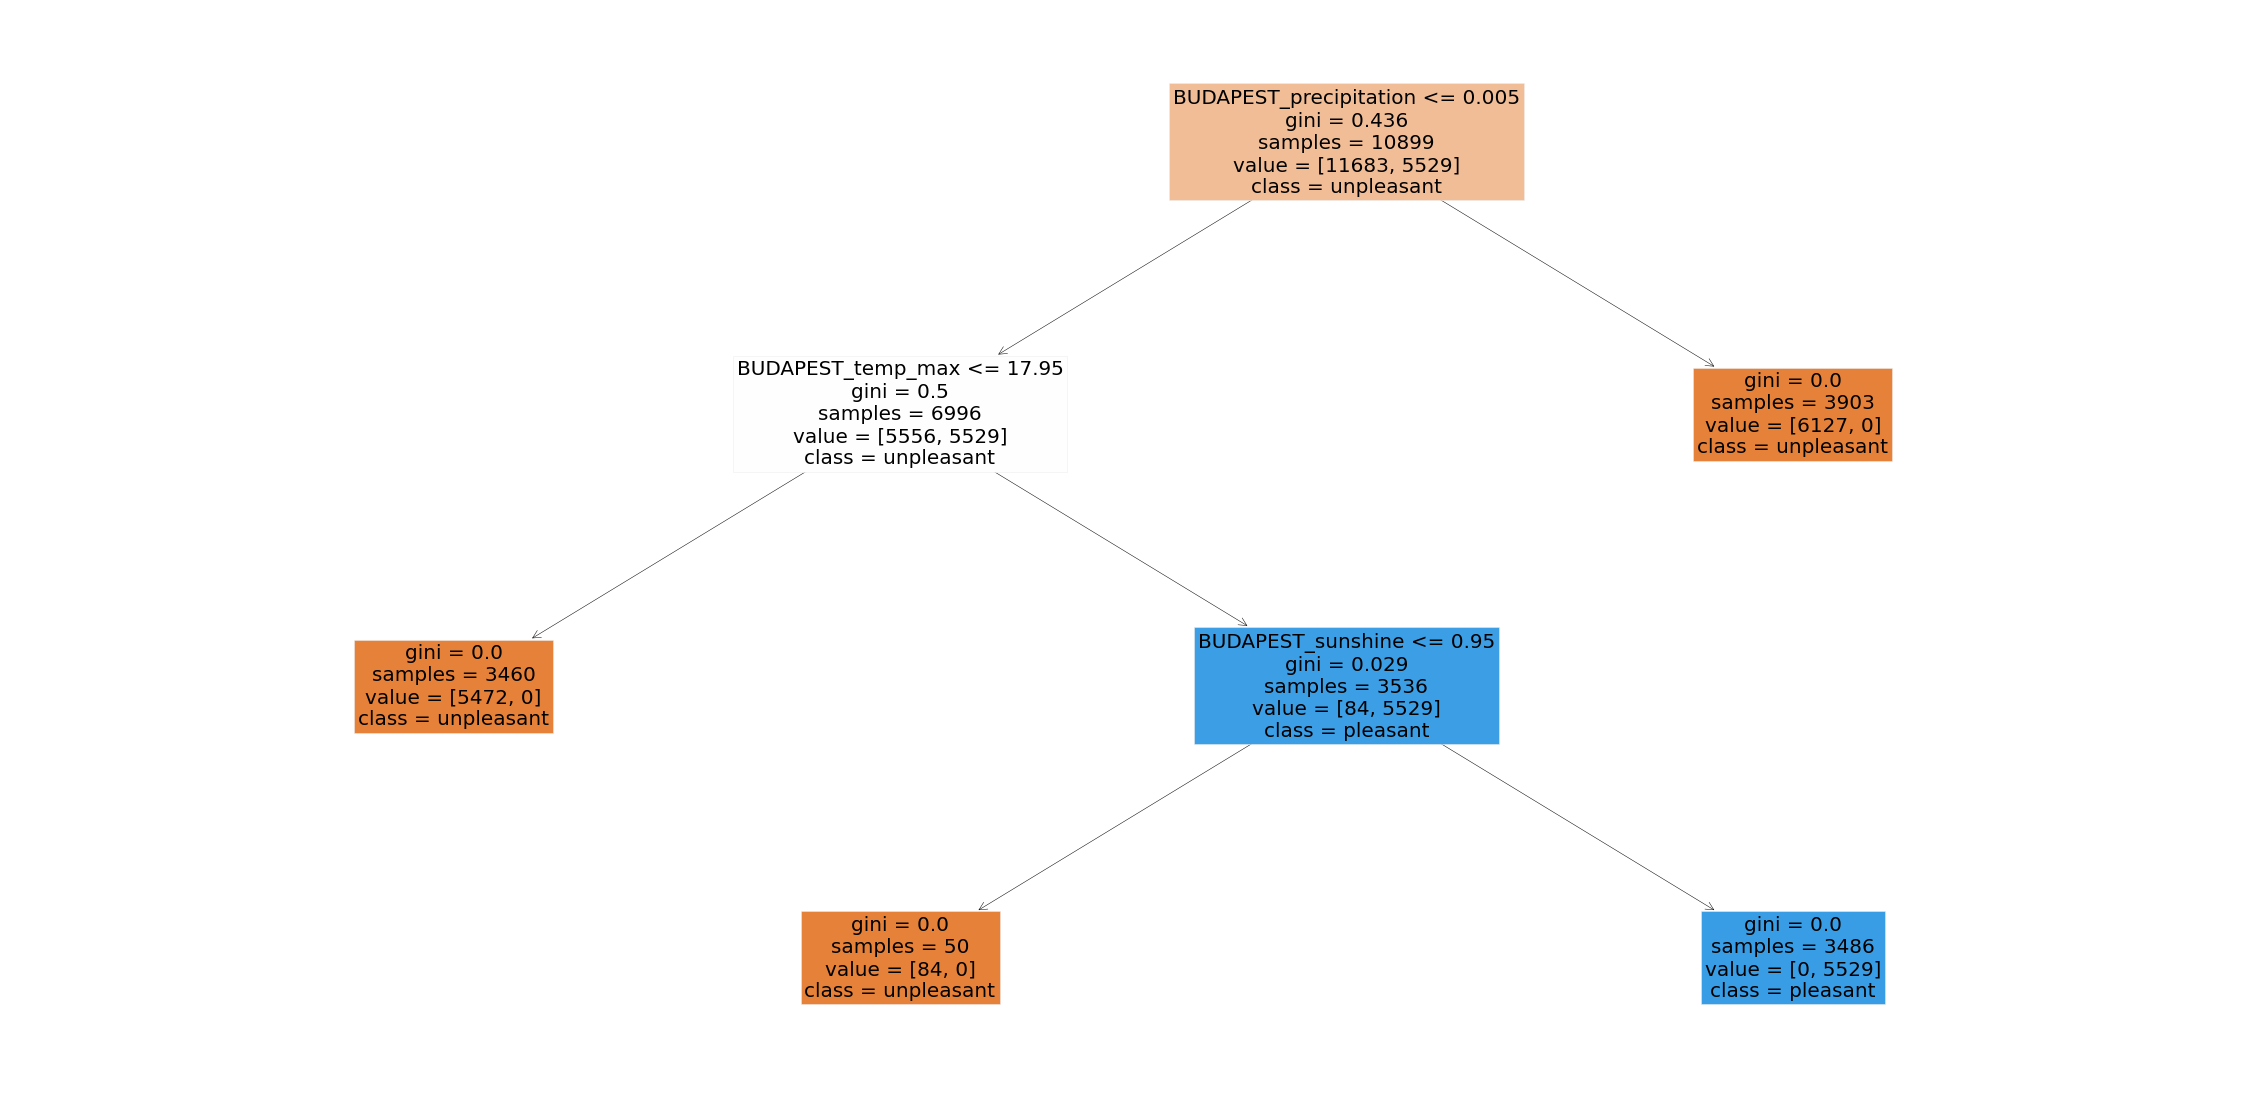

In [93]:
# Plot random forest (Budapest)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_budapest.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [94]:
rf_4.savefig(os.path.join(path, '04 Reports', 'Visualizations', 'random_forest_budapest.png'),bbox_inches='tight')

In [95]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.01191883 0.00381442 0.00240919 0.05375349 0.24011591 0.07122525
 0.18817122 0.04139864 0.38719305]
(9,)


In [96]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [97]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
8          temp_max    0.387193
4     precipitation    0.240116
6         temp_mean    0.188171
5          sunshine    0.071225
3  global_radiation    0.053753
7          temp_min    0.041399
0       cloud_cover    0.011919
1          humidity    0.003814
2          pressure    0.002409


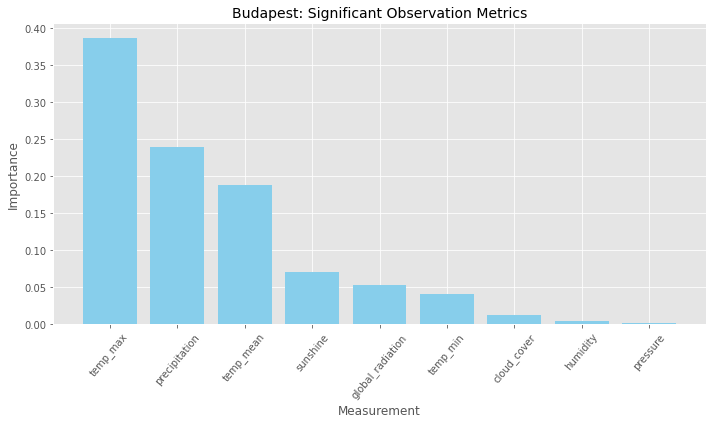

In [98]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

### Basel

In [103]:
# Filter weather dataset to only include Budapest
df_basel = climate[climate.columns[climate.columns.astype(str).str.startswith('BASEL')]]

# Check output
df_basel.head(1)

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   

   BASEL_temp_max  
0            10.9

In [104]:
# Filter pleasant dataset to only include Ljubljana
basel_pleasant = df[df.columns[df.columns.astype(str).str.startswith('BASEL')]]

# Check output
basel_pleasant.head(1)

BASEL_pleasant_weather
0                       0

In [105]:
# Check shape
print(df_basel.shape)
print(basel_pleasant.shape)

(22950, 9)
(22950, 1)


In [106]:
# Create matrices
y_5 = basel_pleasant.max(axis=1)

# Check shape
print("Shape of y_5_combined:", y_5.shape)

Shape of y_5_combined: (22950,)


In [107]:
# Check unique values in y_combined to ensure it's correct
print("Unique values in y_5_combined:", y_5.unique())

Unique values in y_5_combined: [0 1]


In [108]:
# Ensure y has the correct shape
y_5 = y_5.to_numpy().reshape(-1)

# Check shape
print(y_5.shape)

(22950,)


In [110]:
# Create X matrix
X_5 = df_basel.to_numpy()

# Check shapes of the matrices
print(X_5.shape)
print(y_5.shape)

(22950, 9)
(22950,)


In [111]:
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, random_state=127)

# Check shapes
print(X_train_5.shape, y_train_5.shape)
print(X_test_5.shape, y_test_5.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### Random Forest - Basel

In [112]:
# Creating a Random Forest classifier
clf_5 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_5.fit(X_train_5, y_train_5)

RandomForestClassifier(max_depth=3)

In [113]:
# Perform the predictions on the test dataset
y_pred_5 = clf_5.predict(X_test_5)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_5, y_pred_5))

Model Accuracy:  0.9945974207040781


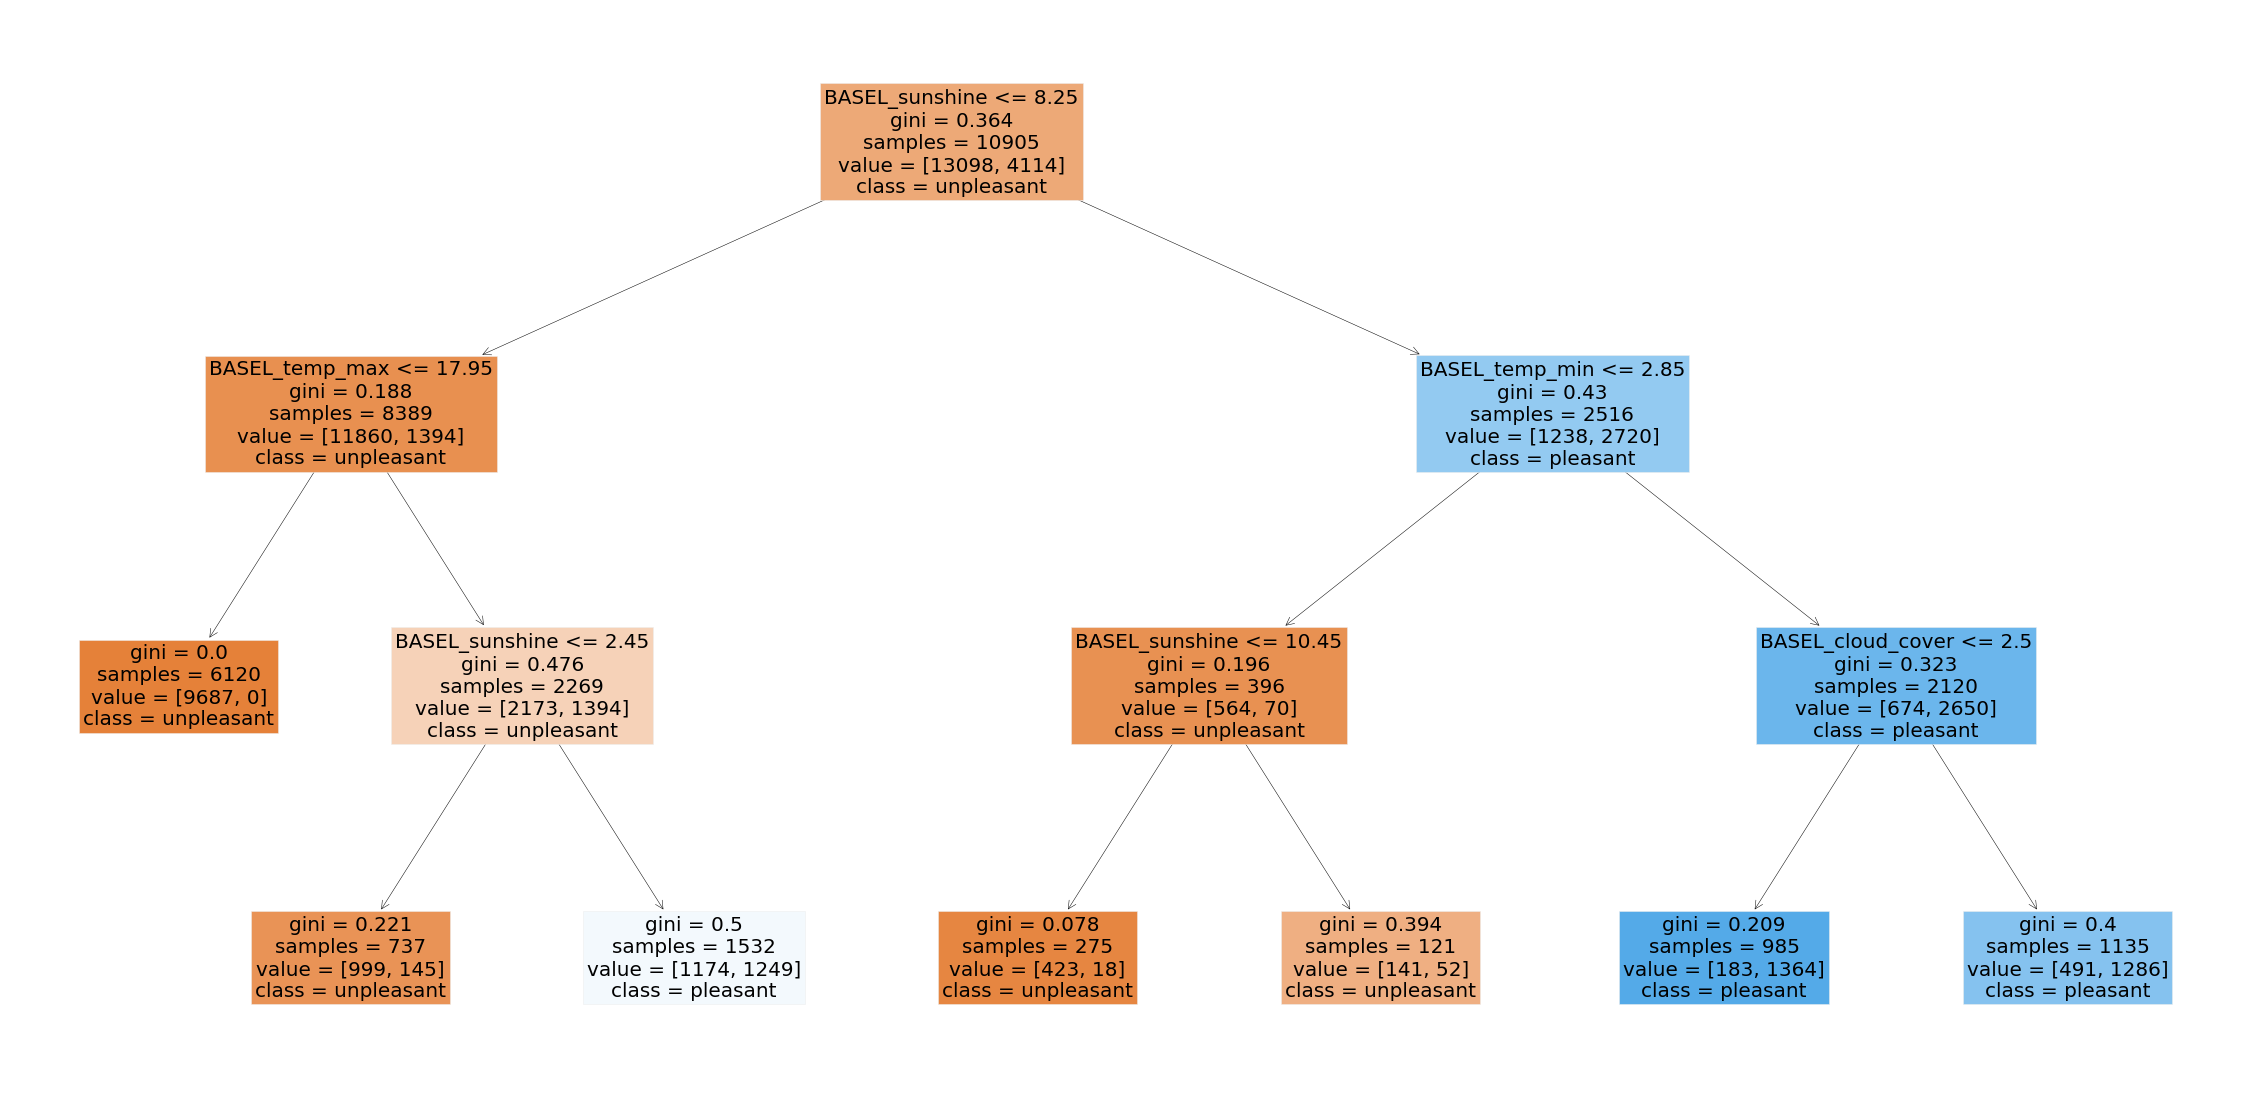

In [114]:
# Plot random forest (Ljubljana)
rf_5 = plt.figure(figsize=(40,20))
plot_tree(clf_5.estimators_[5], fontsize = 20, feature_names=df_basel.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [115]:
# Export plot
rf_5.savefig(os.path.join(path, '04 Reports', 'Visualizations', 'random_forest_ljubljana.png'),bbox_inches='tight')

In [116]:
# Retrieve feature importances from the trained model
feature_importances_5 = clf_5.feature_importances_
print("Feature Importances:", feature_importances_5)
print(feature_importances_5.shape)

Feature Importances: [0.02556189 0.01007733 0.00289393 0.16043356 0.23368609 0.12327219
 0.1305254  0.03023442 0.28331519]
(9,)


In [117]:
# Create a dataframe to associate observation measurements with their importances
importances_df_5 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_5
})

In [118]:
# Sort by importance for chart readability
importances_df_5= importances_df_5.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_5)

Feature Importance:
        Measurement  Importance
8          temp_max    0.283315
4     precipitation    0.233686
3  global_radiation    0.160434
6         temp_mean    0.130525
5          sunshine    0.123272
7          temp_min    0.030234
0       cloud_cover    0.025562
1          humidity    0.010077
2          pressure    0.002894


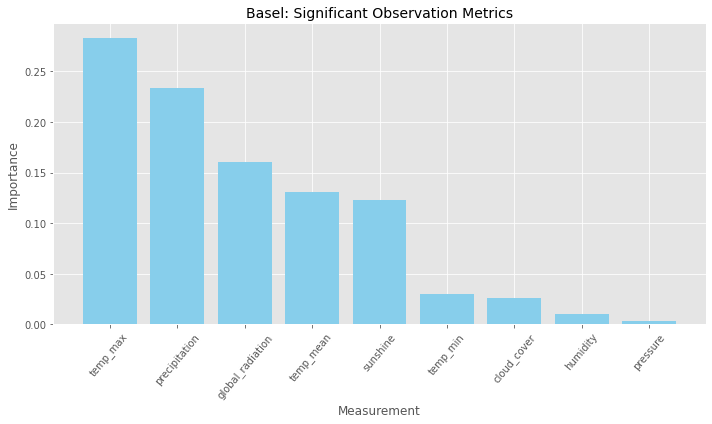

In [119]:
# Plot the importances

plt.style.use('ggplot')
plt_5 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_5['Measurement'], importances_df_5['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Basel: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()